In [17]:
import tensorflow as tf


In [18]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
import pandas as pd


In [4]:
data=pd.read_csv('/content/drive/MyDrive/archive/twitter_training.csv')
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
data1=pd.read_csv('/content/drive/MyDrive/archive/twitter_validation.csv')
data1

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [8]:
data1.shape

(999, 4)

In [9]:
data.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [10]:
data1['Facebook'].count()

999

In [11]:
list(data1)

['3364',
 'Facebook',
 'Irrelevant',
 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣']

In [12]:
data1.groupby(['Facebook','Irrelevant']).count()

3364  \
Facebook        Irrelevant         
Amazon          Irrelevant     3   
                Negative       6   
                Neutral       18   
                Positive       7   
ApexLegends     Irrelevant     3   
...                          ...   
Xbox(Xseries)   Positive       7   
johnson&johnson Irrelevant     3   
                Negative      13   
                Neutral       19   
                Positive       4   

                            I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
Facebook        Irrelevant                                                                                                                                                                                                                                                      
Amazon          Irrelevant                                                  3                                                                                                                                                                                                   
                Negative                                                    6                                                                                                                                                                                                   
                Neutral                                                    18                                                                                                                                                                                                   
                Positive                                                    7                                                                                                                                                                                                   
ApexLegends     Irrelevant                                                  3                                                                                                                                                                                                   
...                                                                       ...                                                                                                                                                                                                   
Xbox(Xseries)   Positive                                                    7                                                                                                                                                                                                   
johnson&johnson Irrelevant                                                  3                                                                                                                                                                                                   
                Negative                                                   13                                                                                                                                                                                                   
                Neutral                                                    19                                                                                                                                                                                                   
                Positive                                                    4                                                                                                                                                                                                   

[126 rows

In [13]:
data1.groupby('Facebook').count()

,3364,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
Facebook,,,
Amazon,34,34,34
ApexLegends,36,36,36
AssassinsCreed,33,33,33
Battlefield,26,26,26
Borderlands,33,33,33
CS-GO,32,32,32
CallOfDuty,31,31,31
CallOfDutyBlackopsColdWar,27,27,27
Cyberpunk2077,30,30,30


In [14]:
count=data1['Facebook'].value_counts()
count

Facebook
RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
TomClancysRainbowSix                 35
GrandTheftAuto(GTA)                  35
Fortnite                             34
Amazon                               34
AssassinsCreed                       33
Borderlands                          33
PlayStation5(PS5)                    33
Hearthstone                          32
Overwatch                            32
Verizon                              32
CS-GO                                32
Facebook                             32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                          

In [15]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Irrelevant')

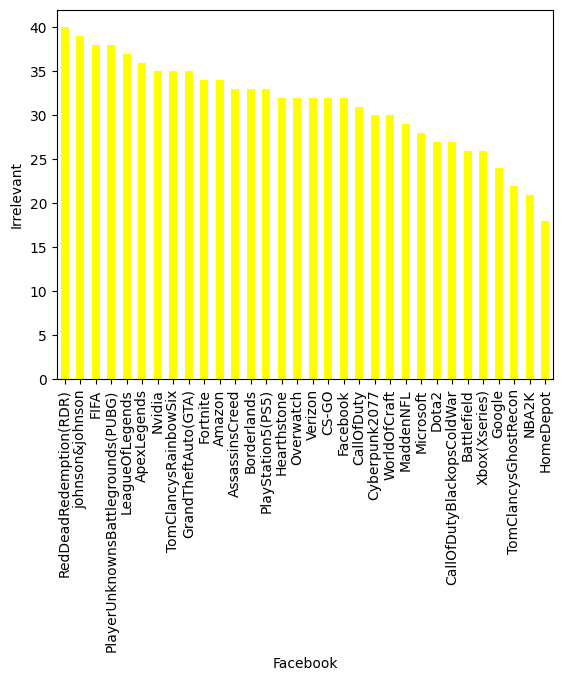

In [16]:
count.plot(kind='bar',color='yellow')
plt.ylabel('Irrelevant')